# **Challenge: If a tree falls in the forest...**

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from IPython.display import Image
import pydotplus
import graphviz
import time
%matplotlib inline
sns.set_style('white')

boston = load_boston()
data = boston.data
target = boston.target

# Exploring the Data
### Save boston data to DataFrame
### `MEDV` is our target variable, representing median home value in thousands of US dollars

In [79]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check feature datatypes

In [80]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Plot distribution of target variable `MEDV`

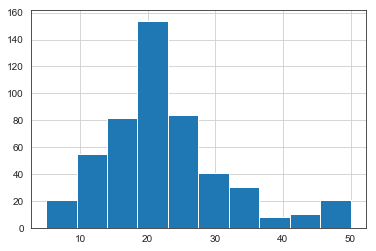

In [81]:
df['MEDV'].hist()

Our distribution looks a bit skewed due to some values at the upper end, around 50. However, the mean appears to be close to 20, so when creating our decision tree and random forest classifier models, we will use this threshold to convert our target variable into a categorial feature.

# Decision Tree Regressor
### Define data and target

In [82]:
# Define data and target (X and Y)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = df['MEDV']

### Generate decision tree

In [83]:
dt_start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor()
decision_tree.fit(X, Y)

dt_scores = cross_val_score(decision_tree, X, Y, cv = 5)
dt_runtime = time.time() - dt_start_time

print("Cross Validation Scores: \n", dt_scores)
print("Decision Tree Regressor Accuracy: {:.2%}".format(dt_scores.mean()))
print ("Decision Tree Regressor Runtime: ", dt_runtime)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Cross Validation Scores: 
 [ 0.68027785  0.61375843  0.67119504  0.41432212 -1.85203432]
Decision Tree Regressor Accuracy: 10.55%
Decision Tree Regressor Runtime:  0.15533995628356934


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# **Random Forest Regressor**
### Generate random forest

In [84]:
rf_start_time = time.time()
rf = ensemble.RandomForestRegressor()
rf_scores = cross_val_score(rf, X, Y, cv=5)
rf_runtime = time.time() - rf_start_time
runtime_ratio = rf_runtime/dt_runtime

print("Cross Validation Scores: \n", rf_scores)
print("Random Forest Regressor Accuracy: {:.2%}".format(rf_scores.mean()))
print("Random Forest Regressor Runtime: ", rf_runtime)
print("Runtime ratio: ", runtime_ratio)

Cross Validation Scores: 
 [0.73776201 0.83549167 0.73885879 0.45293151 0.21949155]
Random Forest Regressor Accuracy: 59.69%
Random Forest Regressor Runtime:  0.22701811790466309
Runtime ratio:  1.4614277185082183


# Regressor Analysis

I built two regressor models for the Boston house prices dataset, decision tree and random forest, with a cross-validation using 5 folds. While I was able to get better cross validation scores for the random forest, it took three times as long as the decision tree classifier, as evidenced by the runtime ratio of ~3. Thus, there is a time cost associated with using a random forest regressor, despite the improvement in performance.

# **Decision Tree Classifier**
### Convert `MEDV` to a categorical (binary) variable with a threshold of 20

In [85]:
df['MEDV_cat']= (df['MEDV'] > 20).astype(int)

### Define data and target

In [86]:
# Define data and target (X and Y)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = df['MEDV_cat']

### Generate decision tree

Cross Validation Scores: 
 [0.73529412 0.69306931 0.81188119 0.91089109 0.68316832]
Decision Tree Classifier Accuracy: 76.69%
Decision Tree Classifier Runtime:  0.1798391342163086


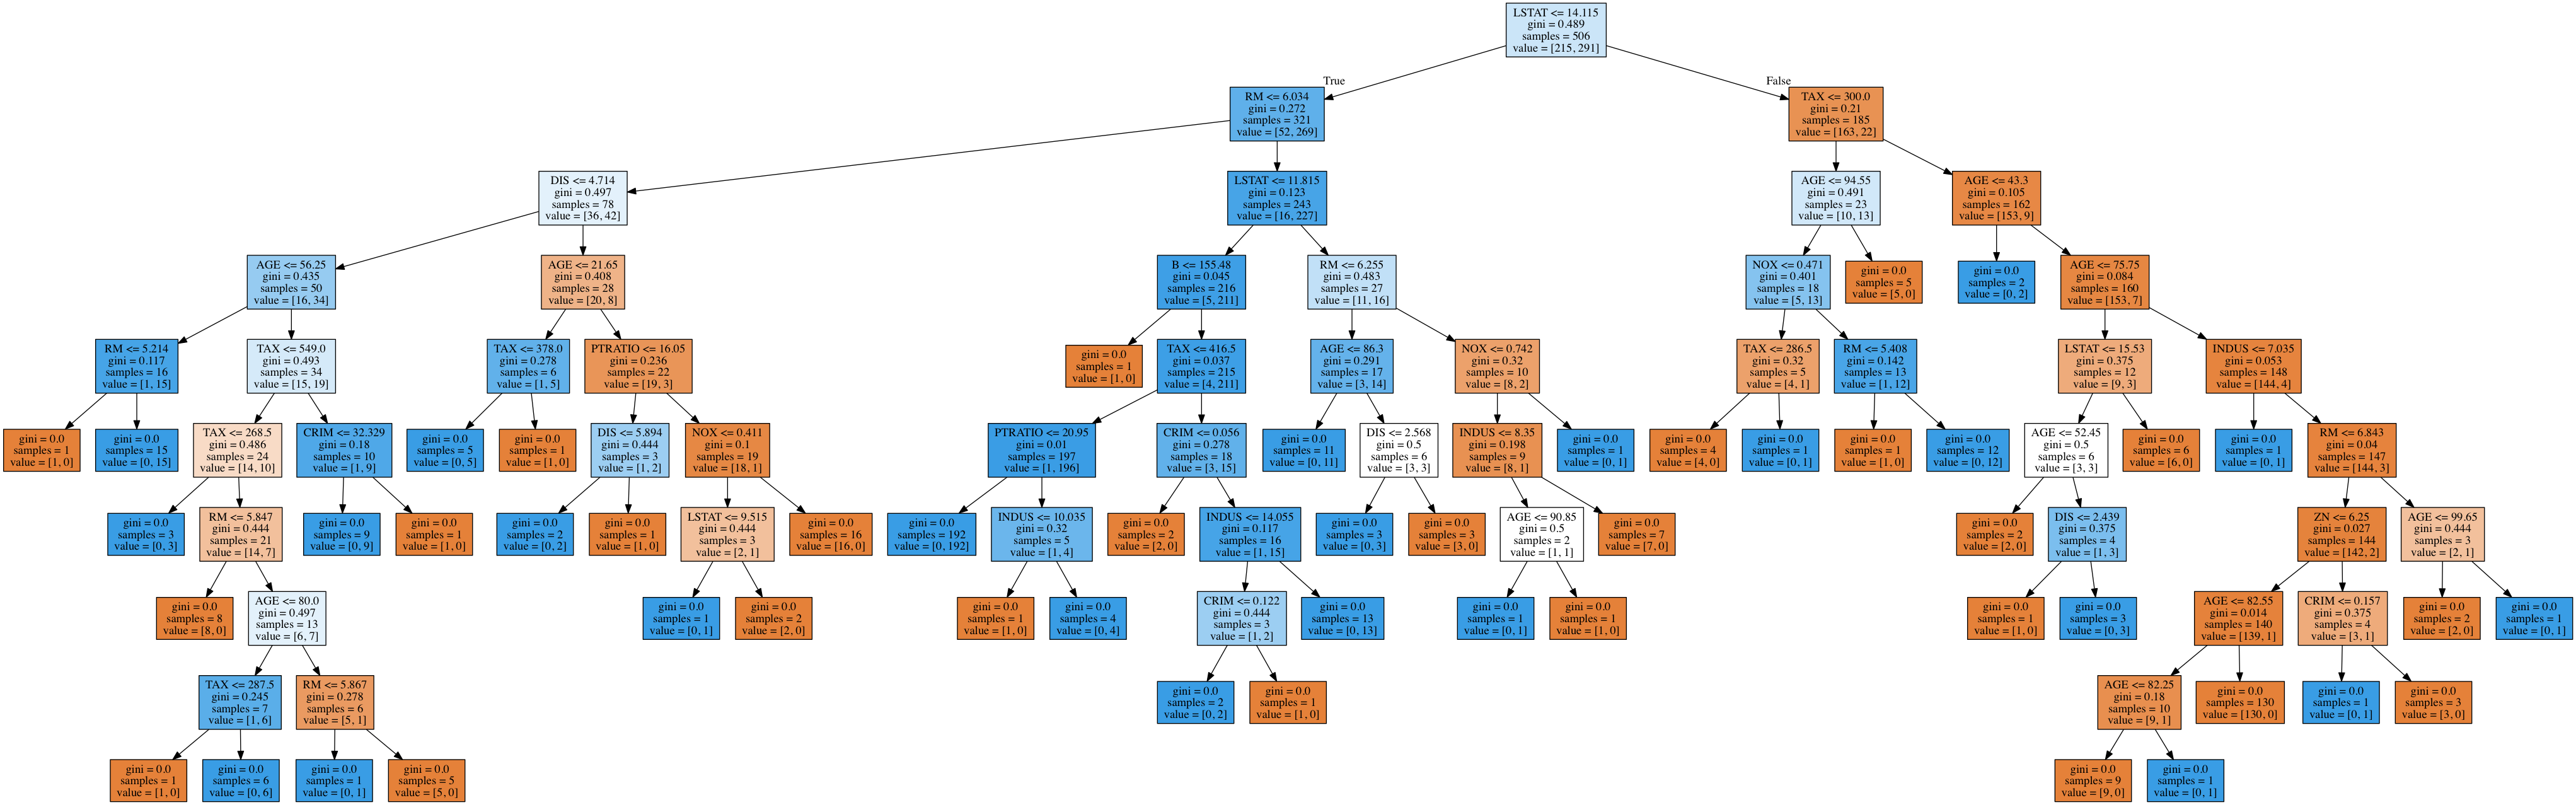

In [87]:
dt_start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X, Y)

dt_scores = cross_val_score(decision_tree, X, Y, cv = 5)
dt_runtime = time.time() - dt_start_time

print("Cross Validation Scores: \n", dt_scores)
print("Decision Tree Classifier Accuracy: {:.2%}".format(dt_scores.mean()))
print ("Decision Tree Classifier Runtime: ", dt_runtime)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **Random Forest Classifier**
### Generate random forest

In [88]:
rf_start_time = time.time()
rf = ensemble.RandomForestClassifier()
rf_scores = cross_val_score(rf, X, Y, cv=5)
rf_runtime = time.time() - rf_start_time
runtime_ratio = rf_runtime/dt_runtime

print("Cross Validation Scores: \n", rf_scores)
print("Random Forest Regressor Accuracy: {:.2%}".format(rf_scores.mean()))
print("Random Forest Regressor Runtime: ", rf_runtime)
print("Runtime ratio: ", runtime_ratio)

Cross Validation Scores: 
 [0.71568627 0.85148515 0.77227723 0.93069307 0.67326733]
Random Forest Regressor Accuracy: 78.87%
Random Forest Regressor Runtime:  0.1852271556854248
Runtime ratio:  1.0299602280259843


# Classifier Analysis

The running time for both my classifier models were faster than my regressor models, which makes sense as the classifiers only have to operate with a categorical target variable. Interestingly, however, in this case I noticed that both my decision tree classifier and random forest classifier models had similar runtimes, as evidenced by the runtime ratio of ~1. Thus, using a random forest classifier doesn't appear to incur the same runtime overhead as the random forest regressor, as it is much easier for the the model to process a categorical target variable, as opposed to continuous.